In [2]:
from gensim.models import KeyedVectors
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import requests
from sklearn.manifold import TSNE
import matplotlib.patches as patches
import re
import pickle
import google_conf
import matplotlib.gridspec as gridspec


In [3]:
# point out to your google service account and a google sheet URL to which you wish to send your data
theos_data = google_conf.setup(sheet_url="https://docs.google.com/spreadsheets/d/19gfECdrg5rDiU2PhNYL1nKifeKzemCfYtYrAHQX5vXE/edit?usp=sharing", service_account_path="../../../ServiceAccountsKey.json")

In [4]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [5]:
# global parameters for plots
#plt.style.use("fast")
plt.style.use("seaborn-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    #each figure to be saved in four different versions
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

In [6]:
#!pip install --upgrade git+https://github.com/kbatsuren/wiktra/

from wiktra.Wiktra import Transliterator
tr = Transliterator()

In [7]:
greek_word = "ἱδρύω"
transli = tr.tr(greek_word, lang='grc', sc='Grek', to_sc='Latn', explicit=True)
def transliterator(term):
    transli = tr.tr(strip_accents(term), lang='grc', sc='Grek', to_sc='Latn', explicit=True)
    transli = transli.replace("Kh", "Ch")
    return transli

In [8]:
from greek_accentuation.characters import strip_accents
strip_accents("ἱδρύω")

'ἱδρυω'

In [9]:
transliterator("ἱδρύω")

'hidruō'

In [10]:
with open("../data/subcorpora_ids_dict.pickle", "rb") as f:
    subcorpora_ids_dict= pickle.load(f)

In [11]:
with open("../data/shared_vocabulary.pickle", "rb") as f:
    shared_vocabulary = pickle.load(f)

In [12]:
subcorpora = list(subcorpora_ids_dict.keys())

religion_final = ["θεός", "Ζεύς", "εὐσεβής", 'ἱερός']
morality_final = ["ἀγαθός", "ἀρετή", "δίκαιος", "τιμή"]

In [13]:
#curl -L -o data/large_data/vectors_sample1m_dict.pickle "https://zenodo.org/records/10685268/files/vectors_sample1m_dict.pickle?download=1"

with open("../data/large_data/vectors_sample1m_dict.pickle", "rb") as f:
    vectors_sample1m_dict = pickle.load(f)

In [14]:
vectors_sample1m_dict["pagan_archaic"].most_similar("θεός", topn=10)

[('Ζεύς', 0.5235968232154846),
 ('ἀθάνατος', 0.45142000913619995),
 ('Κρονίδης', 0.42033568024635315),
 ('μάκαρ', 0.40976470708847046),
 ('ἄλλος', 0.4085693359375),
 ('ἀγήραος', 0.3908531367778778),
 ('νόος', 0.3755967319011688),
 ('Ὀλύμπιος', 0.37464356422424316),
 ('τιμή', 0.3715208172798157),
 ('βροτός', 0.3592821955680847)]

In [15]:
# load a json file under an url as a python dictionary object called "agree_benchmark_json":
url = "https://zenodo.org/records/8027490/files/3_agree_final_benchmark.json?download=1"
agree_benchmark_json = requests.get(url).json()

In [16]:
len(agree_benchmark_json["pairs"])

539

In [17]:
pairs_available = []
for pair_data in agree_benchmark_json["pairs"]:
    pair_list = pair_data["pair"].split(", ")
    if set(pair_list).issubset(shared_vocabulary):
         print(pair_data)
         pairs_available.append(pair_list)

{'pair': 'κακός, ἀγαθός', 'origin': 'task1'}
{'pair': 'κακός, καλός', 'origin': 'task1'}
{'pair': 'κακός, πονηρός', 'origin': 'task1'}
{'pair': 'κακός, αἰσχρός', 'origin': 'task1'}
{'pair': 'κακός, δειλός', 'origin': 'task1'}
{'pair': 'μέγας, μικρός', 'origin': 'task1'}
{'pair': 'μέγας, θεός', 'origin': 'task1'}
{'pair': 'μέγας, μακρός', 'origin': 'task1'}
{'pair': 'μέγας, μέγεθος', 'origin': 'task1'}
{'pair': 'Ἀθηναῖος, πόλις', 'origin': 'task1'}
{'pair': 'Ἀθηναῖος, Λακεδαιμόνιος', 'origin': 'task1'}
{'pair': 'παλαιός, νέος', 'origin': 'task1'}
{'pair': 'παλαιός, γέρων', 'origin': 'task1'}
{'pair': 'παλαιός, ἀρχαῖος', 'origin': 'task1'}
{'pair': 'χρυσός, χαλκός', 'origin': 'task1'}
{'pair': 'χρυσός, ἄργυρος', 'origin': 'task1'}
{'pair': 'χρυσός, βασιλεύς', 'origin': 'task1'}
{'pair': 'χρυσός, πλοῦτος', 'origin': 'task1'}
{'pair': 'χρυσός, σίδηρος', 'origin': 'task1'}
{'pair': 'χρυσός, χρύσεος', 'origin': 'task1'}
{'pair': 'ἐλεύθερος, πολίτης', 'origin': 'task1'}
{'pair': 'ἐλεύθερος, δ

In [18]:
len(pairs_available)

148

In [21]:
 "καλός" in shared_vocabulary

True

In [22]:
pairs_available

[['κακός', 'ἀγαθός'],
 ['κακός', 'καλός'],
 ['κακός', 'πονηρός'],
 ['κακός', 'αἰσχρός'],
 ['κακός', 'δειλός'],
 ['μέγας', 'μικρός'],
 ['μέγας', 'θεός'],
 ['μέγας', 'μακρός'],
 ['μέγας', 'μέγεθος'],
 ['Ἀθηναῖος', 'πόλις'],
 ['Ἀθηναῖος', 'Λακεδαιμόνιος'],
 ['παλαιός', 'νέος'],
 ['παλαιός', 'γέρων'],
 ['παλαιός', 'ἀρχαῖος'],
 ['χρυσός', 'χαλκός'],
 ['χρυσός', 'ἄργυρος'],
 ['χρυσός', 'βασιλεύς'],
 ['χρυσός', 'πλοῦτος'],
 ['χρυσός', 'σίδηρος'],
 ['χρυσός', 'χρύσεος'],
 ['ἐλεύθερος', 'πολίτης'],
 ['ἐλεύθερος', 'δοῦλος'],
 ['ἄγριος', 'θήρ'],
 ['ἄγριος', 'ὗς'],
 ['ἄγριος', 'θρασύς'],
 ['ἄγριος', 'ζῷον'],
 ['ἄγριος', 'ἥμερος'],
 ['ἄγριος', 'θηρίον'],
 ['ψευδής', 'ἀλήθεια'],
 ['ψευδής', 'ἀληθής'],
 ['ναῦς', 'θάλασσα'],
 ['ναῦς', 'κυβερνήτης'],
 ['ναῦς', 'πλέω'],
 ['πατήρ', 'μήτηρ'],
 ['πατήρ', 'υἱός'],
 ['πατήρ', 'θυγάτηρ'],
 ['πατήρ', 'παῖς'],
 ['πατήρ', 'Ζεύς'],
 ['εἰρήνη', 'πόλεμος'],
 ['εἰρήνη', 'ἡσυχία'],
 ['πρέσβυς', 'γέρων'],
 ['πρέσβυς', 'νέος'],
 ['πρέσβυς', 'ἄγγελος'],
 ['πρέσβυς', 'ἀρ

In [23]:
vectors_sample1m_dict["pagan_classical"].vectors.shape

(4892, 100)

In [24]:
ranks = []
for pair in pairs_available:
    kv = vectors_sample1m_dict["pagan_classical"]
    nns = kv.most_similar(pair[0], topn=len(kv.key_to_index))
    for n, nn in enumerate(nns):
        if nn[0] == pair[1]:
            ranks.append(n)
np.mean(ranks)

472.9527027027027

In [25]:
np.median(ranks)

74.0

(array([33., 11., 10.,  8.,  4.,  4.,  2.,  3.,  4.,  3.,  3.,  0.,  1.,
         2.,  0.,  1.,  1.,  2.,  0.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160, 170, 180, 190]),
 <BarContainer object of 19 artists>)

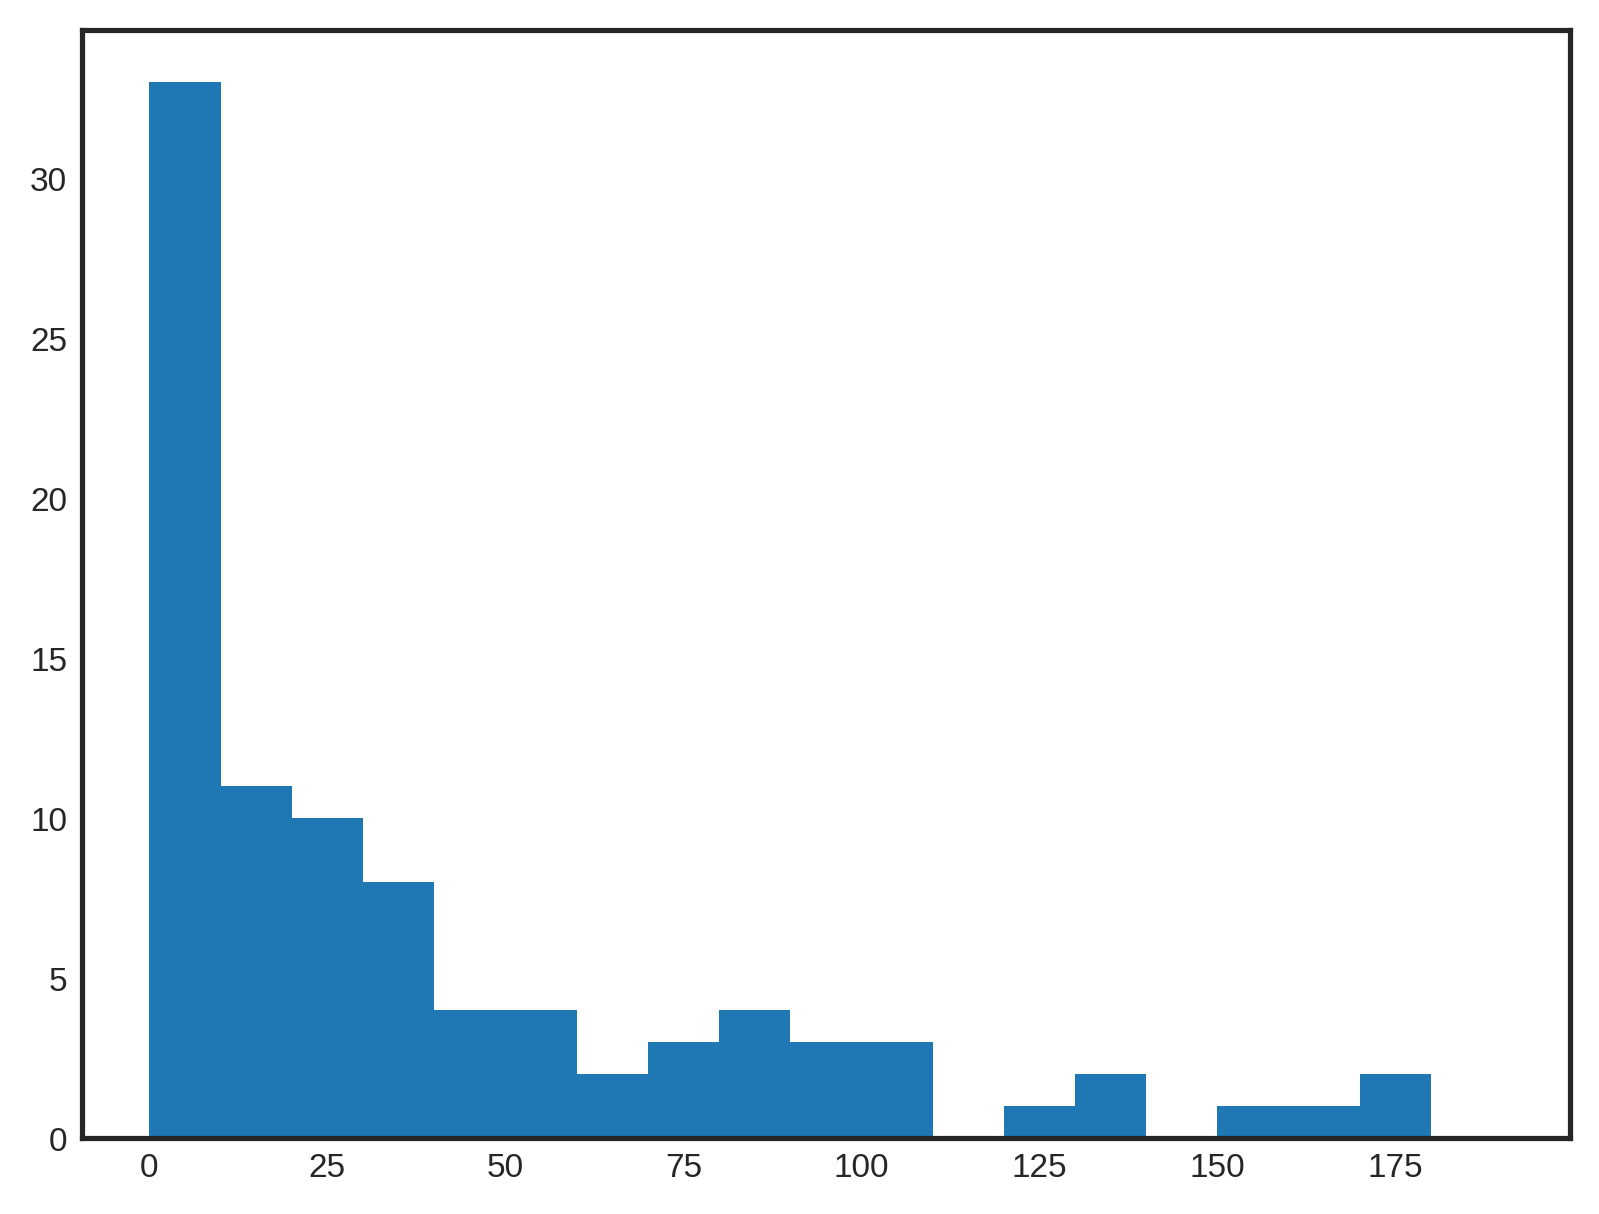

In [26]:
plt.hist(ranks, bins=range(0,200,10))

In [27]:
subcorpora_ranks = []
for subcorpus in subcorpora:
    kv = vectors_sample1m_dict[subcorpus]
    ranks = []
    for pair in pairs_available:
        nns = kv.most_similar(pair[0], topn=len(kv.key_to_index))
        for n, nn in enumerate(nns):
            if nn[0] == pair[1]:
                ranks.append(n)
    subcorpora_ranks.append(ranks)

In [28]:
subcorpora_ranks

[[51,
  607,
  701,
  2657,
  17,
  2236,
  14,
  160,
  453,
  1161,
  8,
  38,
  295,
  7,
  376,
  2,
  1551,
  419,
  16,
  142,
  807,
  125,
  431,
  685,
  1953,
  2697,
  3189,
  933,
  624,
  712,
  99,
  325,
  269,
  39,
  16,
  41,
  0,
  20,
  2785,
  610,
  992,
  1839,
  1692,
  1401,
  1906,
  0,
  317,
  20,
  2,
  2514,
  123,
  2673,
  27,
  2734,
  41,
  1736,
  12,
  1256,
  0,
  2131,
  55,
  3038,
  3719,
  2740,
  3212,
  3687,
  835,
  2322,
  2742,
  28,
  1942,
  1158,
  525,
  2890,
  1,
  3476,
  1748,
  3675,
  168,
  492,
  913,
  1351,
  163,
  3133,
  1687,
  3113,
  1430,
  209,
  776,
  30,
  2584,
  65,
  11,
  1002,
  6,
  46,
  386,
  583,
  876,
  341,
  83,
  3745,
  301,
  1343,
  1102,
  2706,
  2980,
  1826,
  230,
  1,
  2923,
  3446,
  71,
  1297,
  2449,
  67,
  2404,
  451,
  62,
  234,
  5,
  9,
  1043,
  276,
  229,
  468,
  47,
  2131,
  1194,
  966,
  6,
  2446,
  368,
  2036,
  318,
  208,
  81,
  226,
  24,
  435,
  564,
  2261,
  22

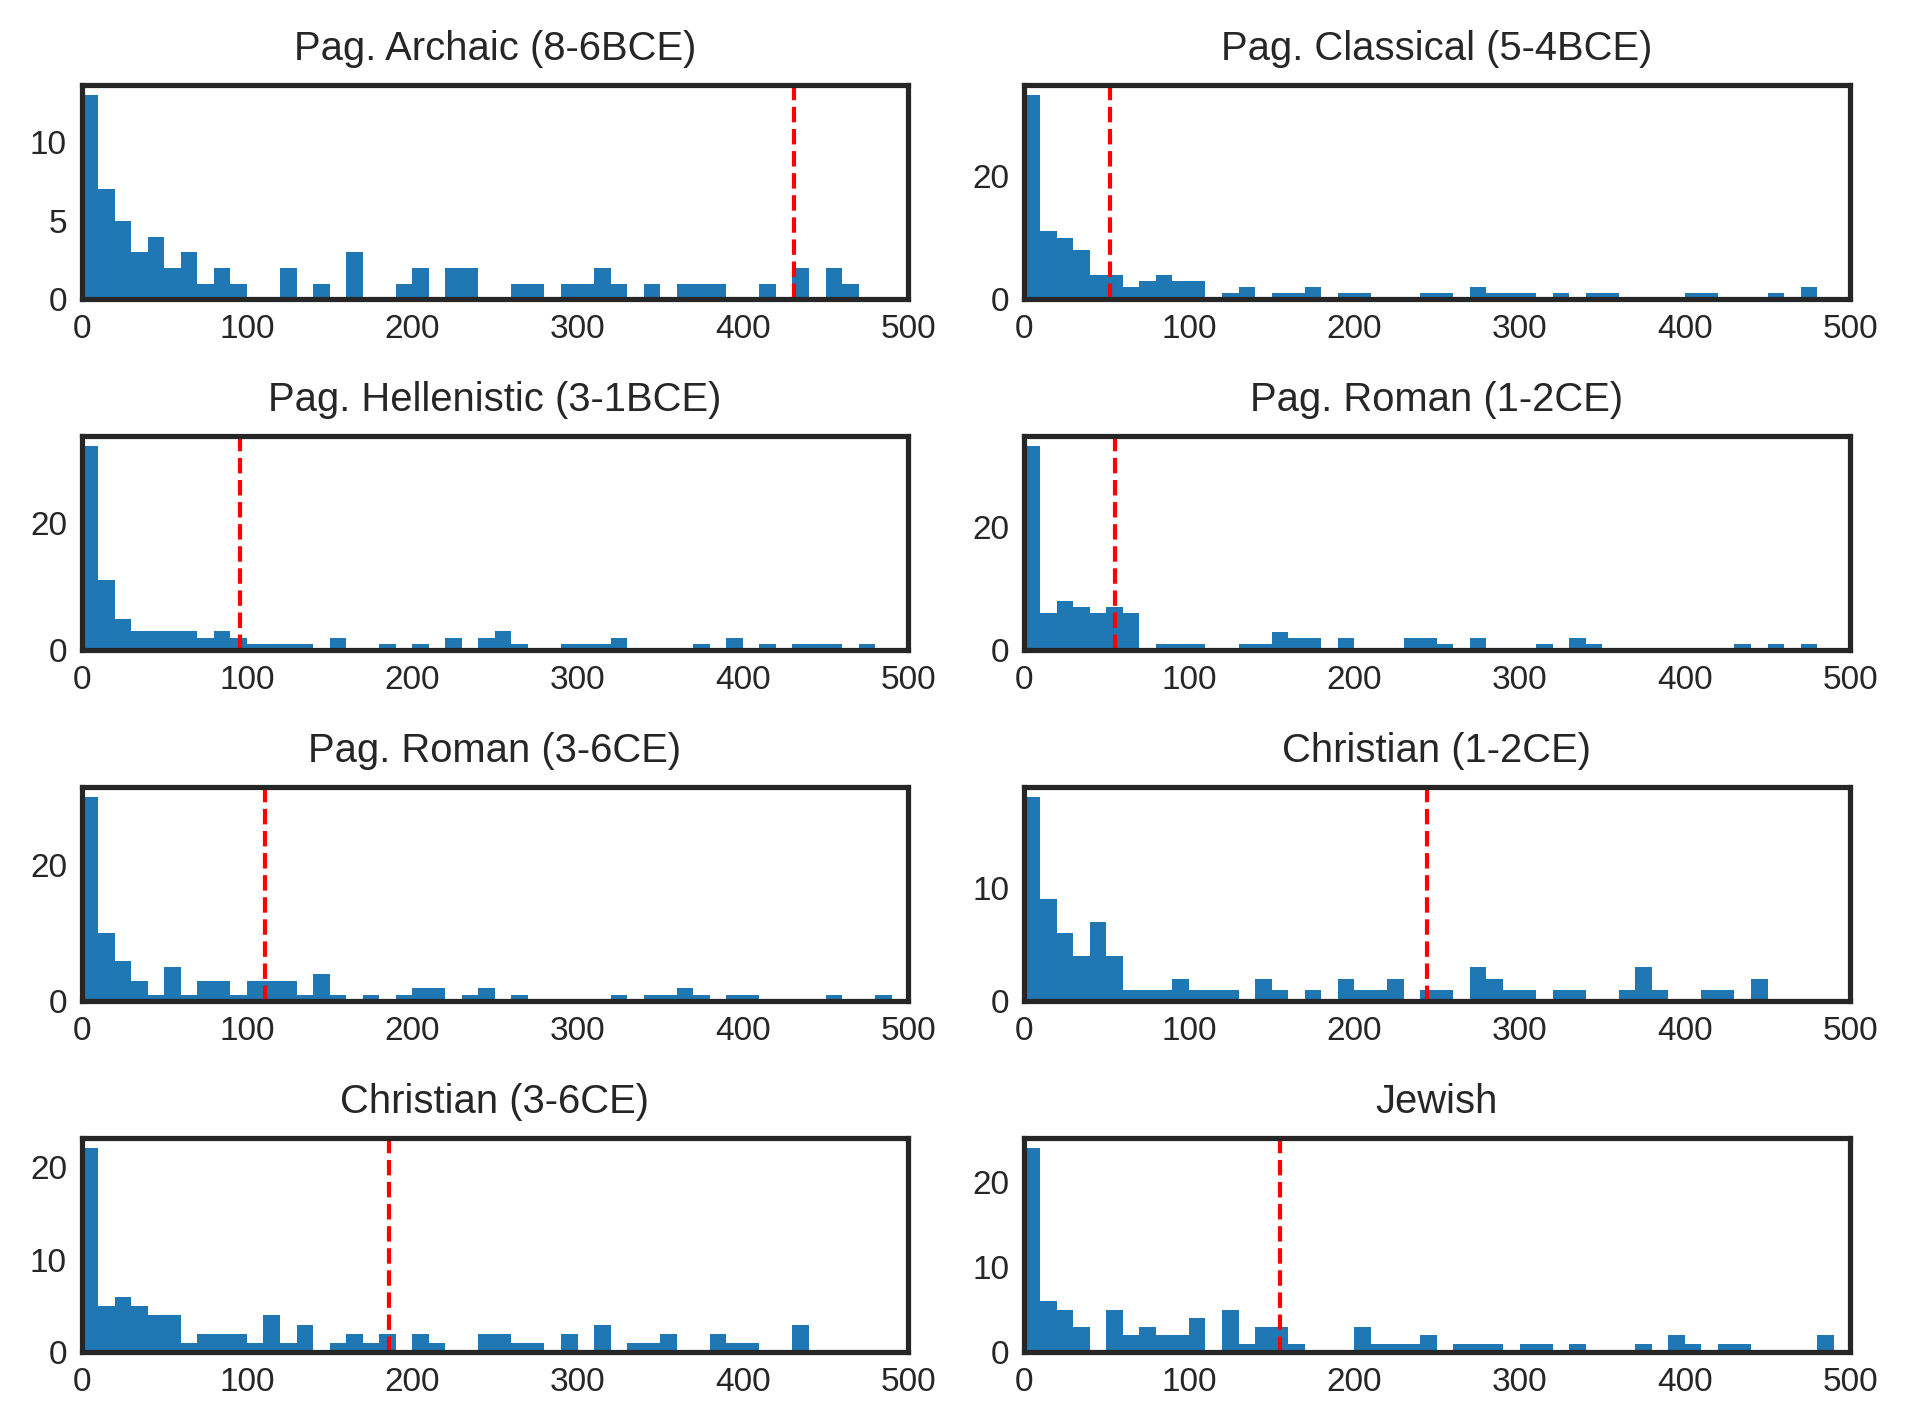

In [40]:
subcorpora_labels = ["Pag. Archaic (8-6BCE)", "Pag. Classical (5-4BCE)", "Pag. Hellenistic (3-1BCE)",
                     "Pag. Roman (1-2CE)", "Pag. Roman (3-6CE)", "Christian (1-2CE)", "Christian (3-6CE)", "Jewish"]
fig, axs = plt.subplots(4,2, tight_layout=True)
for subcorpus, ax, ranks in zip(subcorpora_labels, axs.ravel(), subcorpora_ranks):
    # created filtered ranks which remove 10% values from the list with the highest value
    filtered_ranks = sorted(ranks)[:int(len(ranks)*0.9)] #
    ax.hist(filtered_ranks, bins=range(0,500,10))
    # plot median value of ranks as vertical line:
    ax.axvline(np.median(filtered_ranks), color='red', linestyle='dashed', linewidth=1)
    # plot mean value of ranks as vertical line:
    #ax.axvline(np.mean(filtered_ranks), color='green', linestyle='dashed', linewidth=1)
    ax.set_title(subcorpus)
    ax.set_xlim(0,500)